## Name - Nilesh Dilip Lalge
## Email - nileshlalge8394@gmail.com
## Course - BE in CSE
## Internship From - LetsGrowMore

## Task 2 Develop A Neural Network That Can Read Handwriting


# -

### We will be using MNIST data, this dataset actually 60000 training images and 10000 testing images, these are hand written digits we will classify the numbers from 0 to 9

In [2]:
import tensorflow
import warnings
warnings.filterwarnings("ignore")

In [14]:
#loading the dataset 
from tensorflow.keras.datasets import mnist
#Load_data method - this will give 2 tuples one with training data and train target and other with test data and test target
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [16]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

Label:9


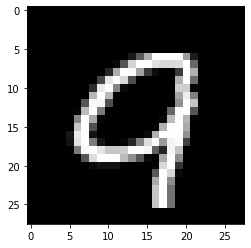

In [19]:
import matplotlib.pyplot as plt
print("Label:{}".format(y_train[3000]))
plt.imshow(X_train[3000],cmap='gray')

In [20]:
X_train[3000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
#We are representing our input as 28 X 28 image, hence we have 784 features that are explaining every images
#We know that we have 10 classes as output
#my input layer will have 784 neurons and output layer will have 10

#Also I understand my features are 784, but they are represented in 28 X 28
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
print(X_train.shape)

(60000, 784)


In [22]:
#Since the images are pixels ranging from 0 to 255, I will normalize them
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [23]:
#we also need to modify the target
print(y_train.shape)

(60000,)


In [24]:
print(y_train[100])
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test,num_classes=10)
print(y_train[100])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
#Create the model
#We will create Sequential model , and we are currently focussing on fully connected feed forward networks , 
#so for mentioning a layer to be fully connected we used something called Dense
#Sequential is a model -- Dense is a layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers




In [42]:
hidden_layer_nodes = 256
output_layer_nodes = 10
model = Sequential()
model.add(Dense(hidden_layer_nodes,input_shape=(784,),activation='relu'))
model.add(Dense(hidden_layer_nodes,activation='relu'))
model.add(Dense(output_layer_nodes,activation='softmax'))

#we need to tell the model that its performing a classifcation problem so we need to compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=30,batch_size=1000,verbose=1)
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

Epoch 1/30
60/60 [==============================] - 1s 15ms/step - loss: 2.1551 - accuracy: 0.3042
Epoch 2/30
60/60 [==============================] - 1s 15ms/step - loss: 1.8303 - accuracy: 0.6077
Epoch 3/30
60/60 [==============================] - 1s 15ms/step - loss: 1.4766 - accuracy: 0.7117
Epoch 4/30
60/60 [==============================] - 1s 15ms/step - loss: 1.1633 - accuracy: 0.7652
Epoch 5/30
60/60 [==============================] - 1s 15ms/step - loss: 0.9396 - accuracy: 0.7972
Epoch 6/30
60/60 [==============================] - 1s 15ms/step - loss: 0.7924 - accuracy: 0.8194
Epoch 7/30
60/60 [==============================] - 1s 15ms/step - loss: 0.6940 - accuracy: 0.8357
Epoch 8/30
60/60 [==============================] - 1s 15ms/step - loss: 0.6247 - accuracy: 0.8478
Epoch 9/30
60/60 [==============================] - 1s 15ms/step - loss: 0.5737 - accuracy: 0.8579
Epoch 10/30
60/60 [==============================] - 1s 15ms/step - loss: 0.5343 - accuracy: 0.8654
Epoch 11/

In [ ]:
#Random initiazation and evalaution

In [34]:
#How many parameters that our model is learning?
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# #Another version just to change the optimizer

# hidden_layer_nodes = 256
# output_layer_nodes = 10
# model = Sequential()
# model.add(Dense(hidden_layer_nodes,input_shape=(784,),activation='relu'))
# model.add(Dense(hidden_layer_nodes,activation='relu'))
# model.add(Dense(output_layer_nodes,activation='softmax'))
# sgd = optimizers.SGD(learning_rate=0.01,momentum=0.9)
# #As we discussed we need to tell the model that its performing a classifcation problem so we need to compile the model
# model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# model.fit(X_train,y_train,epochs=30,batch_size=1000,verbose=1)
# print("Training Accuracy")
# print(model.evaluate(X_train,y_train))
# print("Test accuracy")
# print(model.evaluate(X_test,y_test))

In [43]:
#Lets add dropout
from tensorflow.keras.layers import Dropout
hidden_layer_nodes = 256
output_layer_nodes = 10
model = Sequential()
model.add(Dense(hidden_layer_nodes,input_shape=(784,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(hidden_layer_nodes,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_layer_nodes,activation='softmax'))

#we need to tell the model that its performing a classifcation problem so we need to compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=30,batch_size=1000,verbose=1)
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

Epoch 1/30
60/60 [==============================] - 2s 20ms/step - loss: 2.2920 - accuracy: 0.1513
Epoch 2/30
60/60 [==============================] - 1s 20ms/step - loss: 2.0856 - accuracy: 0.2779
Epoch 3/30
60/60 [==============================] - 1s 20ms/step - loss: 1.8883 - accuracy: 0.3944
Epoch 4/30
60/60 [==============================] - 1s 20ms/step - loss: 1.6856 - accuracy: 0.4801
Epoch 5/30
60/60 [==============================] - 1s 20ms/step - loss: 1.5005 - accuracy: 0.5418
Epoch 6/30
60/60 [==============================] - 1s 20ms/step - loss: 1.3455 - accuracy: 0.5853
Epoch 7/30
60/60 [==============================] - 1s 20ms/step - loss: 1.2197 - accuracy: 0.6216
Epoch 8/30
60/60 [==============================] - 1s 20ms/step - loss: 1.1263 - accuracy: 0.6497 
Epoch 9/30
60/60 [==============================] - 1s 20ms/step - loss: 1.0503 - accuracy: 0.6713
Epoch 10/30
60/60 [==============================] - 1s 20ms/step - loss: 0.9885 - accuracy: 0.6900
Epoch 11

In [40]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',min_delta=0.01,patience=5)

In [53]:
0.4812-0.3972

0.08400000000000002

In [54]:
#Lets add dropout
from tensorflow.keras.layers import Dropout
hidden_layer_nodes = 256
output_layer_nodes = 10
model = Sequential()
model.add(Dense(hidden_layer_nodes,input_shape=(784,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(hidden_layer_nodes,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_layer_nodes,activation='softmax'))

#we need to tell the model that its performing a classifcation problem so we need to compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=1000,callbacks=[early_stop],verbose=1)
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

Epoch 1/100
60/60 [==============================] - 2s 20ms/step - loss: 2.3325 - accuracy: 0.1317
Epoch 2/100
60/60 [==============================] - 1s 20ms/step - loss: 2.1128 - accuracy: 0.2486
Epoch 3/100
60/60 [==============================] - 1s 21ms/step - loss: 1.9232 - accuracy: 0.3704
Epoch 4/100
60/60 [==============================] - 1s 20ms/step - loss: 1.7289 - accuracy: 0.4687
Epoch 5/100
60/60 [==============================] - 1s 20ms/step - loss: 1.5355 - accuracy: 0.5353
Epoch 6/100
60/60 [==============================] - 1s 20ms/step - loss: 1.3729 - accuracy: 0.5795
Epoch 7/100
60/60 [==============================] - 1s 21ms/step - loss: 1.2357 - accuracy: 0.6196
Epoch 8/100
60/60 [==============================] - 1s 20ms/step - loss: 1.1296 - accuracy: 0.6469
Epoch 9/100
60/60 [==============================] - 1s 20ms/step - loss: 1.0480 - accuracy: 0.6720
Epoch 10/100
60/60 [==============================] - 1s 19ms/step - loss: 0.9813 - accuracy: 0.6904

In [56]:
#Lets add dropout
from tensorflow.keras.layers import Dropout
hidden_layer_nodes = 256
output_layer_nodes = 10
model = Sequential()
model.add(Dense(hidden_layer_nodes,input_shape=(784,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(hidden_layer_nodes,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_layer_nodes,activation='softmax'))

#we need to tell the model that its performing a classifcation problem so we need to compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=1000,callbacks=[early_stop],validation_data=(X_test,y_test),verbose=1)
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

Epoch 1/100
60/60 [==============================] - 2s 27ms/step - loss: 2.2938 - accuracy: 0.1427 - val_loss: 2.0806 - val_accuracy: 0.4629
Epoch 2/100
60/60 [==============================] - 1s 23ms/step - loss: 2.0732 - accuracy: 0.2794 - val_loss: 1.8398 - val_accuracy: 0.6324
Epoch 3/100
60/60 [==============================] - 1s 23ms/step - loss: 1.8739 - accuracy: 0.3990 - val_loss: 1.5904 - val_accuracy: 0.6960
Epoch 4/100
60/60 [==============================] - 1s 24ms/step - loss: 1.6783 - accuracy: 0.4798 - val_loss: 1.3548 - val_accuracy: 0.7359
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 1.4996 - accuracy: 0.5354 - val_loss: 1.1541 - val_accuracy: 0.7685
Epoch 6/100
60/60 [==============================] - 1s 23ms/step - loss: 1.3551 - accuracy: 0.5793 - val_loss: 0.9966 - val_accuracy: 0.7945
Epoch 7/100
60/60 [==============================] - 1s 24ms/step - loss: 1.2317 - accuracy: 0.6132 - val_loss: 0.8757 - val_accuracy: 0.8145
Epoch 